iollm analysis

In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [ ]:
## data
data = pd.read_csv('data/iollm_data.csv')
data.head(2)

In [ ]:
data.columns 

Index(['batch_id', 'custom_id', 'problem_id', 'data_source', 'model',
       'reasoning_effort', 'response_id', 'response', 'input_tokens',
       'output_tokens', 'reasoning_tokens', 'total_tokens', 'error',
       'batch_status', 'batch_created_at', 'batch_completed_at', 'n_correct',
       'n_total', 'accuracy_pct', 'chrf', 'scores', 'answer_pairs',
       'eval_error', 'grader'],
      dtype='object')

In [530]:
data['reasoning'] = data.apply(lambda x: x['reasoning_effort'] if 'pro' not in x['model'] else 'pro-high', axis=1)
data['problem_score'] = (data['n_correct'] / data['n_total']) * 20
data['config'] = data['data_source'] + '_' + data['reasoning']
data['problem_group'] = data['config'] + '_' + data['problem_id']

main

In [531]:
main_data = data[data['data_source'] == 'main'].copy()
main_data = main_data.drop_duplicates(subset=['problem_group'], keep='first')

In [532]:
scores = (main_data.groupby('reasoning')['problem_score'].mean() / 20)*100
scores 

reasoning
high        40.193327
low         28.229034
medium      38.158059
none        27.475362
pro-high    39.027964
Name: problem_score, dtype: float64

In [533]:
toks = main_data.groupby('reasoning')['reasoning_tokens'].mean()
toks 

reasoning
high        38025.310000
low          5986.280000
medium      20023.265625
none            0.000000
pro-high    46887.153846
Name: reasoning_tokens, dtype: float64

: 

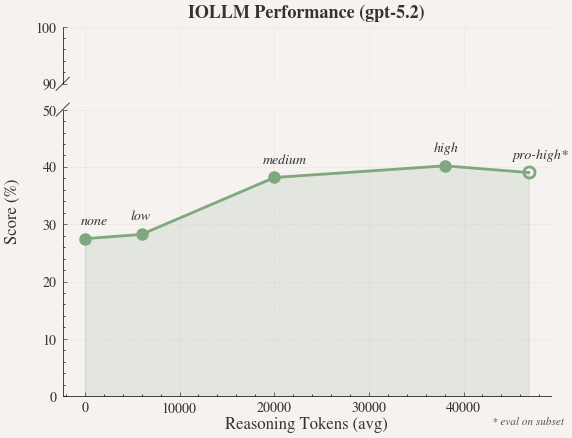

In [551]:
from brokenaxes import brokenaxes

plt.style.use(['science', 'no-latex'])

color = '#7fa87f'
bg_color = '#f5f2ef'
text_color = '#333333'

fig = plt.figure(figsize=(6.3,4.8))
bax = brokenaxes(ylims=((0, 50), (90, 100)), hspace=0.15)

fig.patch.set_facecolor(bg_color)
for ax in bax.axs:
    ax.set_facecolor(bg_color)


sorted_idx = toks.argsort()
sorted_toks = toks.values[sorted_idx]
sorted_scores = scores.values[sorted_idx]
sorted_labels = toks.index[sorted_idx]

bax.fill_between(sorted_toks, sorted_scores, alpha=0.15, color=color)


bax.plot(sorted_toks, sorted_scores, '-', color=color, linewidth=2, zorder=2)

for label in scores.index:
    if label == 'pro-high':
        bax.plot(toks[label], scores[label], 'o', color=color, 
                markersize=8, markerfacecolor='none', markeredgewidth=2, zorder=3)
    else:
        bax.plot(toks[label], scores[label], 'o', color=color, 
                markersize=8, zorder=3)

offsets = {'none': (-3, 10), 'low': (-8, 10), 'medium': (-8, 10), 'high': (-8, 10), 'pro-high': (-12, 10)}
for label in scores.index:
    offset = offsets.get(label, (5, 5))
    display_label = 'pro-high*' if label == 'pro-high' else label
    bax.annotate(display_label, (toks[label], scores[label]), 
                textcoords="offset points", xytext=offset, 
                fontsize=10, fontweight='medium', fontstyle=fontstyle, color='#333')

bax.set_xlabel('Reasoning Tokens (avg)', fontsize=12,color=text_color)
bax.set_ylabel('Score (%)', fontsize=12,color=text_color)
bax.set_title('IOLLM Performance (gpt-5.2)', fontsize=13, fontweight='bold',color=text_color)
bax.tick_params(axis='both', colors=text_color)


bax.grid(True, linestyle=':', alpha=0.4)


ax.text(0.88, -0.1, '* eval on subset', transform=ax.transAxes, 
        fontsize=8, color='#555555', fontstyle='italic')

# Clean up axes
bax.spines['top'].set_visible(False)
bax.spines['right'].set_visible(False)
bax.set_xlim(-1000, max(toks) * 1.1)
bax.set_ylim(0, 100)



plt.tight_layout()
plt.show()

In [ ]:
high = data[data['reasoning'] == 'high']
high = high[high['data_source'] == 'main']

In [624]:
(high['problem_score'] == 20.0 ).sum() / len(data) * 100 

np.float64(0.7239819004524887)

In [ ]:
(high['problem_score'] >= 18.0 ).sum() / len(data) * 100 

np.float64(0.9954751131221719)

In [ ]:
(high['problem_score'] == 0.0 ).sum() / len(data) * 100 

np.float64(1.9004524886877827)

In [ ]:
qs = high['problem_score'] / 20 
np.quantile(qs,0.25), np.quantile(qs,0.5), np.quantile(qs,0.75), np.quantile(qs,0.95)

(np.float64(0.09090909090909091),
 np.float64(0.34523809523809523),
 np.float64(0.6666666666666666),
 np.float64(1.0))